### ***Import Libaries***

In [15]:
import numpy as np
import tensorflow as tf
import numpy as np
import tkinter as tk
import time
import random
from Fire_Fighter_Env import FireFighterEnv, FireGameUI  
import matplotlib.pyplot as plt
from Fire_Fighter_Env import FireFighterEnv
from DQN_model import DQN


### ***Train DQN Model***

In [ ]:
# Initialize environment
env = FireFighterEnv()
state_size = (env.size[0], env.size[1])
action_size = 4 

# Initialize model
num_episodes = 30
num_timesteps = 200
batch_size = 32
dqn = DQN(state_size, action_size, use_cnn=True)

# Training variables
rewards_history = []
time_step = 0

for episode in range(num_episodes):
    state = env.reset() 
    state = state['grid']
    total_reward = 0

    for t in range(num_timesteps):
        time_step += 1
        if time_step % dqn.update_rate == 0:
            dqn.update_target_network()

        action = dqn.epsilon_greedy(state)
        next_state, reward, done, _ = env.step(action)
        next_state = next_state['grid']  
        dqn.store_transition(state, action, reward, next_state, done)
        dqn.train(batch_size)

        state = next_state
        total_reward += reward

        if done:
            break
    
    dqn.save_best_weights(total_reward)
    rewards_history.append(total_reward)
    print(f"Episode {episode}, Total Reward: {total_reward}, Avg Loss: {dqn.loss_history[-1] if dqn.loss_history else 0}")

dqn.save_final_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
update best weights -2360
Episode 0, Total Reward: -2360, Avg Loss: 35.69665444830207
update best weights -2110
Episode 1, Total Reward: -2110, Avg Loss: 63.461540729047556
Episode 2, Total Reward: -2380, Avg Loss: 128.94307871733326
Episode 3, Total Reward: -2360, Avg Loss: 4.841521585709415
Episode 4, Total Reward: -2380, Avg Loss: 107.05015073544928
Episode 5, Total Reward: -2400, Avg Loss: 41.734503417384985
Episode 6, Total Reward: -2210, Avg Loss: 78.35779704365632
Episode 7, Total Reward: -2400, Avg Loss: 106.16872745996807
Episode 8, Total Reward: -2400, Avg Loss: 36.44870941701129
Episode 9, Total Reward: -2360, Avg Loss: 56.0533477030830

### ***Show Results***

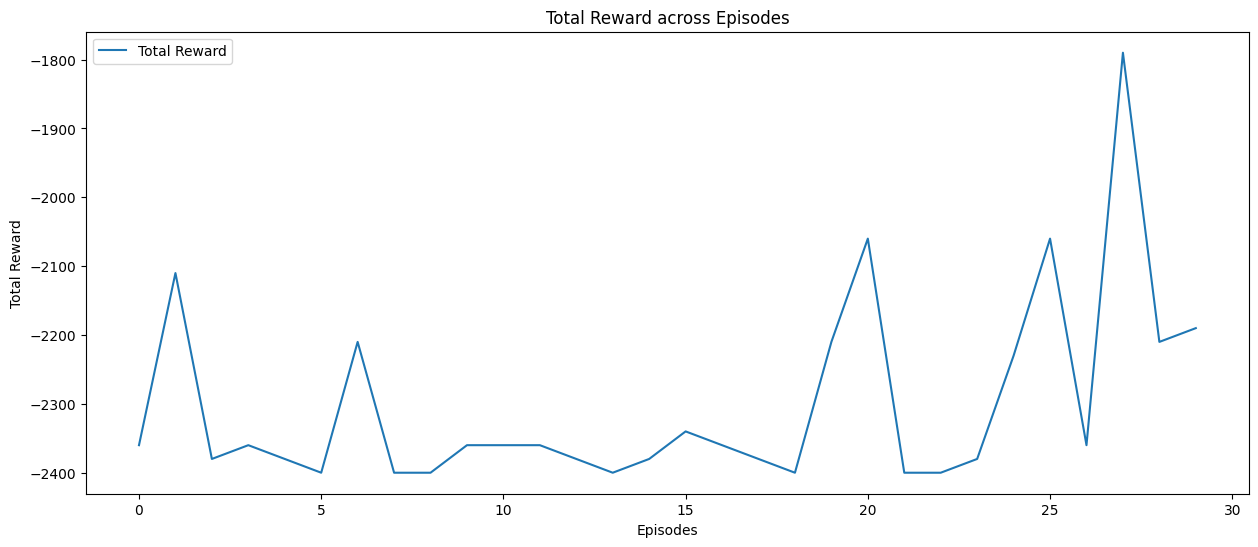

In [ ]:
# Plot training rewards
def plot_training(rewards):
    plt.plot(rewards, 'g-', label='Total Rewards')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.title('Training Progress')
    plt.legend()
    plt.show()

plot_training(rewards_history)

### ***Run environment using best DQN weighs***

In [30]:
model = tf.keras.models.load_model("Best_DQN_Model.keras")

env = FireFighterEnv(size=9, fire_spawn_delay=10, max_steps=200)

root = tk.Tk()
ui = FireGameUI(root, env)


state = env.reset()
state = state['grid']
done = False


epsilon = 0.5

def run_episode():
    global state, done
    if not done:
        
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 3)
        else:
            Q_values = model.predict(np.expand_dims(state, axis=0), verbose=0)
            action = np.argmax(Q_values[0])

        next_state, reward, done, _ = env.step(action)
        next_state = next_state['grid']

        state = next_state
        ui.render(action)

    
    root.after(1000, run_episode)  

root.after(0, run_episode)
root.mainloop()